webf NOT subset; don't know how to subset; dropped


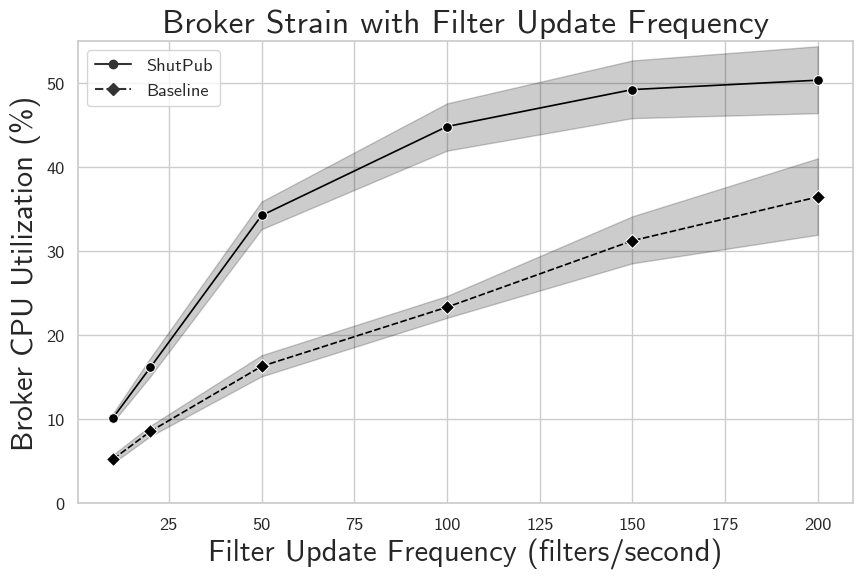

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.signal import find_peaks
import seaborn as sns

sns.set(font_scale=1.2, style='whitegrid', font='CMU Sans Serif')

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['figure.figsize'] = (4.5, 2)
rcParams['figure.dpi'] = 100
rcParams['axes.unicode_minus'] = False

file_set = {
    #ci:1000(10 publishers, 1000 ci, 800 filter number)
    10:[
        'log/filterFrequency/pub_10_filterLength_1000/1000.csv',
        'log/filterFrequency/baseline_pub_10_filterLength_1000/1000.csv',
    ],
    #ci:500(10 publishers, 500 ci, 800 filter number)
    20:[
        # '/Users/minghe/Desktop/filterFrequency/pub_10_filterLength_1000/500.csv',
        'log/filterFrequency/pub_10_filterLength_1000/0914/500.csv',
        'log/filterFrequency/baseline_pub_10_filterLength_1000/500.csv',
    ],
    50:[
        #'/Users/minghe/Desktop/filterFrequency/pub_10_filterLength_1000/200_1.csv',
        'log/filterFrequency/pub_10_filterLength_1000/0914/200_1.csv',
        'log/filterFrequency/pub_10_filterLength_1000/0914/200_2.csv',
        'log/filterFrequency/baseline_pub_10_filterLength_1000/200_1.csv',
    ],

    #ci:100(10 publishers, 100 ci, 800 filter number)
    100:[
        'log/filterFrequency/pub_10_filterLength_1000/100_1.csv',
        'log/filterFrequency/pub_10_filterLength_1000/100_2.csv',
        'log/filterFrequency/baseline_pub_10_filterLength_1000/100_1.csv',
        'log/filterFrequency/baseline_pub_10_filterLength_1000/100_2.csv',
        'log/filterFrequency/baseline_pub_10_filterLength_1000/100_3.csv',
    ],
    #ci:66(10 publishers, 66 ci, 800 filter number)
    150:[
        'log/filterFrequency/pub_10_filterLength_1000/0914/66_1.csv',
        'log/filterFrequency/pub_10_filterLength_1000/0914/66_2.csv',

        'log/filterFrequency/baseline_pub_10_filterLength_1000/66_1.csv',
        'log/filterFrequency/baseline_pub_10_filterLength_1000/66_2.csv',
    ],
    #ci:50(10 publishers, 50 ci, 800 filter number)
    200:[
        'log/filterFrequency/pub_10_filterLength_1000/0914/50_1.csv',
        'log/filterFrequency/pub_10_filterLength_1000/0914/50_3.csv',

        'log/filterFrequency/baseline_pub_10_filterLength_1000/50_1.csv',
    ],
}

dfs = []

for mi, file_paths in file_set.items():
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        mi_broker = df.copy()
        mi_broker['timestamp'] = mi_broker['Unix Time'] - mi_broker['Unix Time'][0]
        mi_broker['messageInterval'] = mi

        if "baseline" in file_path:
            mi_broker['type'] = "baseline"
        else:
            mi_broker['type'] = "psf"

        dfs.append(mi_broker)

merged_df = pd.concat(dfs)

#
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

#  markers=["o", "x"]
g = sns.lineplot(data=merged_df, x='messageInterval', y='CPU Utilization (%)', markers=["o", "D"], style='type', errorbar=("ci",95), color="black", style_order=['psf', 'baseline'],hue_order=['psf', 'baseline'], markersize=7, linewidth=1.2)

plt.xlabel('Filter Update Frequency (filters/second)', fontsize=22)
plt.ylabel('Broker CPU Utilization (%)', fontsize=22)
plt.title("Broker Strain with Filter Update Frequency", fontsize=24)


ax = plt.gca()
ax.set_ylim(0,55)

legend= plt.legend()
legend_labels = legend.texts

for label in legend_labels:
    if label.get_text() == 'psf':
        label.set_text('ShutPub')
    if label.get_text() == 'baseline':
        label.set_text('Baseline')

plt.savefig("filter_frequency_lineplot.pdf")

In [14]:
merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==10]['CPU Utilization (%)'].describe()

count    296.000000
mean      10.206182
std        4.865783
min        0.500000
25%        7.040000
50%        9.500000
75%       12.120000
max       40.300000
Name: CPU Utilization (%), dtype: float64

In [8]:
merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==10]['CPU Utilization (%)'].describe()

count    296.000000
mean       5.265541
std        4.359851
min        0.500000
25%        3.050000
50%        4.070000
75%        5.530000
max       36.820000
Name: CPU Utilization (%), dtype: float64

In [79]:
merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==250]['CPU Utilization (%)'].describe()
# count     52.000000
# mean      40.414038
# std       23.702084
# min        0.000000
# 25%       24.410000
# 50%       37.960000
# 75%       51.927500
# max      100.000000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==20]['CPU Utilization (%)'].describe()
# count    296.000000
# mean       8.552770
# std        5.304939
# min        0.000000
# 25%        5.970000
# 50%        7.040000
# 75%        9.420000
# max       40.300000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==100]['CPU Utilization (%)'].describe()
# count    284.000000
# mean      23.343838
# std       11.695481
# min        0.000000
# 25%       16.650000
# 50%       20.790000
# 75%       25.795000
# max       80.600000
merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==10]['CPU Utilization (%)'].describe()
# count    296.000000
# mean       5.265541
# std        4.359851
# min        0.500000
# 25%        3.050000
# 50%        4.070000
# 75%        5.530000
# max       36.820000

count    296.000000
mean       5.265541
std        4.359851
min        0.500000
25%        3.050000
50%        4.070000
75%        5.530000
max       36.820000
Name: CPU Utilization (%), dtype: float64

In [1]:
merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==150]['CPU Utilization (%)'].describe()
# count    206.000000
# mean      48.619515
# std       21.992759
# min        0.000000
# 25%       29.627500
# 50%       44.445000
# 75%       67.675000
# max      100.000000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==200]['CPU Utilization (%)'].describe()
# count    194.000000
# mean      47.360000
# std       27.500321
# min        0.000000
# 25%       29.740000
# 50%       41.605000
# 75%       59.410000
# max      100.000000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==100]['CPU Utilization (%)'].describe()
# count    198.000000
# mean      44.844596
# std       20.993767
# min        0.000000
# 25%       27.755000
# 50%       44.610000
# 75%       60.492500
# max       99.500000
merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==50]['CPU Utilization (%)'].describe()
# count    176.000000
# mean      41.989659
# std       17.021925
# min        0.000000
# 25%       30.770000
# 50%       41.390000
# 75%       56.940000
# max       86.430000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==30]['CPU Utilization (%)'].describe()
# count    295.000000
# mean      42.390780
# std       20.739086
# min        1.000000
# 25%       23.810000
# 50%       46.970000
# 75%       58.355000
# max       94.500000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==20]['CPU Utilization (%)'].describe()
# count    296.000000
# mean      25.041453
# std       10.798589
# min        0.000000
# 25%       16.897500
# 50%       24.625000
# 75%       32.165000
# max       69.040000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==10]['CPU Utilization (%)'].describe()
# count    296.000000
# mean      10.206182
# std        4.865783
# min        0.500000
# 25%        7.040000
# 50%        9.500000
# 75%       12.120000
# max       40.300000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==40]['CPU Utilization (%)'].describe()
# count    222.000000
# mean      44.090225
# std       20.914207
# min        0.000000
# 25%       28.967500
# 50%       45.825000
# 75%       54.490000
# max       99.500000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==200]['CPU Utilization (%)'].describe()

NameError: name 'merged_df' is not defined

In [3]:
merged_df.dtypes

Time                    object
Unix Time                int64
CPU Utilization (%)    float64
RAM Utilization (%)    float64
timestamp                int64
messageInterval          int64
type                    object
dtype: object

In [35]:
##Frequency

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.signal import find_peaks
import seaborn as sns

sns.set(font_scale=0.9, style='whitegrid', font='CMU Sans Serif')

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['figure.figsize'] = (4.5, 2)
rcParams['figure.dpi'] = 100
rcParams['axes.unicode_minus'] = False

#PSF_BROKER_URL="tcp://34.141.20.0:61616" PSF_CONSUMER_NUM="200" PSF_CONSUMER_INTERVAL="1000" PSF_FILTER_NUM="20" java -jar SubscriberPSF.jar


file_set = {
    1000:[

    ],

    # consumer interval is 100
    700:[

    ],
    # consumer interval is 200
    600:[
        '/Users/minghe/Desktop/filter/CN60_CI200_ PSF_FI10.csv',
        '/Users/minghe/Desktop/filter/baseline_CN60_CI200_ PSF_FI10.csv',


    ],


}

dfs = []

for mi, file_paths in file_set.items():
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        mi_broker = df.copy()
        mi_broker['timestamp'] = mi_broker['Unix Time'] - mi_broker['Unix Time'][0]
        mi_broker['messageInterval'] = mi

        if "baseline" in file_path:
            mi_broker['type'] = "baseline"
        else:
            mi_broker['type'] = "psf"

        dfs.append(mi_broker)

merged_df = pd.concat(dfs)

#
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

#  markers=["o", "x"]
g = sns.lineplot(data=merged_df, x='messageInterval', y='CPU Utilization (%)', markers=["o", "D"], style='type', errorbar=("ci",95), color="black")

plt.xlabel('Filter Amount')
plt.ylabel('Broker CPU Utilization (%)')



count    66.000000
mean     17.560303
std       7.811827
min       0.510000
25%      14.267500
50%      17.335000
75%      20.877500
max      44.060000
Name: CPU Utilization (%), dtype: float64